In [6]:
import yfinance as yf
import talib
from talib import BBANDS
import pandas as pd
import numpy as np
import pandas_datareader as pdr
import matplotlib.pyplot as plt


In [7]:
# Se carga la información de una accion desde Yahoo Finance a una Variable
activo = yf.Ticker("VOO")

In [8]:
precios = activo.history(period="max", interval="1d")
close = precios['Close'].to_numpy()

In [9]:
up, mid, low = BBANDS(close, timeperiod=25, nbdevup=2, nbdevdn=2, matype=0)

In [10]:
def alertaBoll(B, amplitud, alertaPercentil):
    try:
        if B > 1 and alertaPercentil < amplitud:
            alerta = "SobreCompra"
        elif B < 0 and alertaPercentil < amplitud:
            alerta = "SobreVenta"
        elif B > 1:
            alerta = "Sobre Banda Superior sin volatilidad"
        elif B < 0:
            alerta = "Debajo Banda Inferior sin Volatilidad"
        else:
            alerta = "Sin Señal"
        return alerta
    except Exception as e:
        return str(e)

In [11]:
def bbp(price):
    up, mid, low = BBANDS(price, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)
    bbp = (price - low) / (up - low)
    return bbp

In [12]:
BollBeta = bbp(close)

In [13]:
precios['UP'] = up.tolist()
precios['MID'] = mid.tolist()
precios['DOWN'] = low.tolist()
precios['B'] = BollBeta.tolist()

<AxesSubplot: xlabel='Date'>

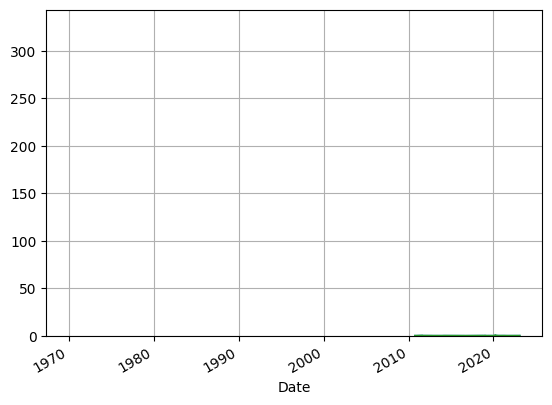

In [14]:
precios['AMPLITUD'] = precios['UP'] / precios['DOWN'] - 1

precios['AMPLITUD'].plot()
precios['AMPLITUD'].hist(bins=100)

precios = precios[precios['AMPLITUD'] < 1]

precios['AMPLITUD'].plot()
precios['AMPLITUD'].hist(bins=100)


In [15]:
alertaPercentil = np.percentile(precios['AMPLITUD'], 90)

precios['Alerta']  = precios.apply(lambda x: alertaBoll(x['B'], x['AMPLITUD'], alertaPercentil), axis=1)

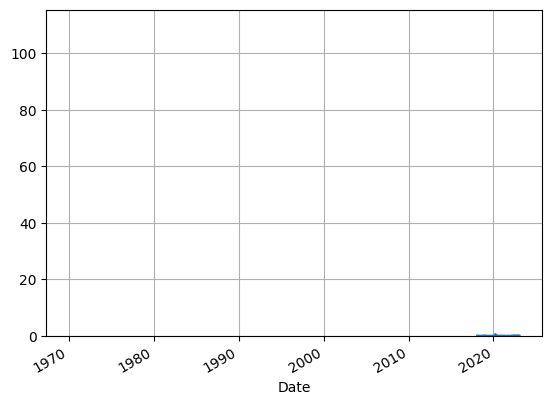

In [16]:
import datetime

fechaLimite = datetime.datetime.now() - datetime.timedelta(days=5*365)
fechaLimite = np.datetime64(fechaLimite)
fechaLimite

precios.dtypes
precios['date'] = precios.index
precios.dtypes
precios['date'] = precios['date'].dt.tz_localize(None)
precios.dtypes


precios = precios[precios['date'] > fechaLimite]

precios['AMPLITUD'].plot()
precios['AMPLITUD'].hist(bins=100)


# Encontrar el percentil 90
alertaPercentil = np.percentile(precios['AMPLITUD'], 90)

In [17]:
# Traer últimos 30 datos para caluclar parámetros de banda
# Si el porcentaje B es negativo o superior a 1 y la amplitud es mayor al 95% se da alerta

preciosHoy = activo.history(period="30d", interval="1d")
close = preciosHoy['Close'].to_numpy()

# Se calculan las bandas de bollinger
up, mid, low = BBANDS(close, timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

BollBeta = bbp(close)


preciosHoy['UP'] = up.tolist()
preciosHoy['MID'] = mid.tolist()
preciosHoy['DOWN'] = low.tolist()
preciosHoy['B'] = BollBeta.tolist()

preciosHoy['AMPLITUD'] = preciosHoy['UP'] / preciosHoy['DOWN'] - 1

preciosHoy['Alerta']  = preciosHoy.apply(lambda x: alertaBoll(x['B'], x['AMPLITUD'], alertaPercentil), axis=1)

In [18]:
preciosHoy.tail(n=30)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,UP,MID,DOWN,B,AMPLITUD,Alerta
Date,,,,,,,,,,,,,,
2022-12-14 00:00:00-05:00,367.340821,371.023168,362.513931,365.410065,4707100,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-15 00:00:00-05:00,360.742438,361.508757,354.761072,356.423126,5126800,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-16 00:00:00-05:00,353.954939,355.129308,350.113351,352.173462,4533100,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-19 00:00:00-05:00,352.442184,352.651175,347.585438,349.138000,5538500,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-20 00:00:00-05:00,348.450012,351.170013,347.209991,349.670013,5068200,1.672,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-21 00:00:00-05:00,352.200012,355.950012,351.700012,354.899994,3832400,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-22 00:00:00-05:00,351.980011,352.250000,344.339996,349.910004,6458200,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-23 00:00:00-05:00,348.929993,351.950012,347.350006,351.869995,4572000,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
2022-12-27 00:00:00-05:00,351.760010,352.040009,348.850006,350.470001,4303200,0.000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,Sin Señal
